# Création du Réseau de neurones

## Importer les données

In [1]:
import glob

In [2]:
# Récupération liste des fichiers femme


list_fichiers_jeune_f = glob.glob("/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/*/*.pt")
list_fichiers_mid_f = glob.glob("/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/mid/*/*.pt")
list_fichiers_vieux_f = glob.glob("/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/vieux/*/*.pt")
list_fichiers_fichiers_total_f = list_fichiers_jeune_f + list_fichiers_mid_f + list_fichiers_vieux_f

print(len(list_fichiers_jeune_f))
print(len(list_fichiers_mid_f))
print(len(list_fichiers_vieux_f))
print(len(list_fichiers_fichiers_total_f))

list_locuteur_jeune_f = [x.split('/')[-2] for x in list_fichiers_jeune_f]
list_locuteur_mid_f = [x.split('/')[-2] for x in list_fichiers_mid_f]
list_locuteur_vieux_f = [x.split('/')[-2] for x in list_fichiers_vieux_f]

print(len(set(list_locuteur_jeune_f)))
print(len(set(list_locuteur_mid_f)))
print(len(set(list_locuteur_vieux_f)))



4828
12949
7662
25439
10
28
15


In [3]:
print(f"Locuteurs jeunes: {set(list_locuteur_jeune_f)}")
print(f"Locuteurs mid: {set(list_locuteur_mid_f)}")
print(f"Locuteurs vieux: {set(list_locuteur_vieux_f)}")

Locuteurs jeunes: {'ESLO2_ENT_1007', 'ESLO2_ENTJEUN_1229', 'ESLO2_ENT_1038', 'ESLO2_ENTJEUN_1236', 'ESLO2_ENTJEUN_1234', 'ESLO2_ENTJEUN_1235', 'ESLO2_ENT_1026', 'ESLO2_ENTJEUN_1230', 'ESLO2_ENTJEUN_1231', 'ESLO2_ENT_1003'}
Locuteurs mid: {'ESLO2_ENT_1056', 'ESLO2_ENT_1085', 'ESLO2_ENT_1045', 'ESLO2_ENT_1062', 'ESLO2_ENT_1076', 'ESLO2_ENT_1070', 'ESLO2_ENT_1071', 'ESLO2_ENT_1067', 'ESLO2_ENT_1002', 'ESLO2_ENT_1051', 'ESLO2_ENT_1060', 'ESLO2_ENT_1034', 'ESLO2_ENT_1058', 'ESLO2_ENT_1020', 'ESLO2_ENT_1042', 'ESLO2_ENT_1044', 'ESLO2_ENT_1083', 'ESLO2_ENT_1008', 'ESLO2_ENT_1033', 'ESLO2_ENT_1036', 'ESLO2_ENT_1016', 'ESLO2_ENT_1043', 'ESLO2_ENT_1005', 'ESLO2_ENT_1018', 'ESLO2_ENT_1031', 'ESLO2_ENT_1057', 'ESLO2_ENT_1077', 'ESLO2_ENT_1022'}
Locuteurs vieux: {'ESLO2_ENT_1021', 'ESLO2_DIA_1222', 'ESLO2_ENT_1015', 'ESLO2_ENT_1009', 'ESLO2_ENT_1023', 'ESLO2_ENT_1024', 'ESLO2_ENT_1035', 'ESLO2_ENT_1039', 'ESLO2_ENT_1065', 'ESLO2_ENT_1030', 'ESLO2_ENT_1004', 'ESLO2_DIA_1224', 'ESLO2_ENT_1052', 'ESLO

In [4]:
# on récupère les ids des locutrices prises en val et test :
test_val_jeune = ['ESLO2_ENTJEUN_1236', 'ESLO2_ENTJEUN_1235', 'ESLO2_ENTJEUN_1229']
test_val_mid = ['ESLO2_ENT_1043', 'ESLO2_ENT_1002', 'ESLO2_ENT_1018', 'ESLO2_ENT_1057', 'ESLO2_ENT_1083', 'ESLO2_ENT_1031', 'ESLO2_ENT_1056', 'ESLO2_ENT_1060']
test_val_vieux = ['ESLO2_DIA_1222', 'ESLO2_ENT_1015', 'ESLO2_ENT_1035', 'ESLO2_ENT_1069', 'ESLO2_ENT_1023']

print(f"Locuteurs jeunes: {test_val_jeune}")
print(f"Locuteurs mid: {test_val_mid}")
print(f"Locuteurs vieux: {test_val_vieux}")

# On récupère les chemins des fichiers val et test :
nbr_total_test_val_jeune = 0
for loc in test_val_jeune:
    nbr_fichiers_jeune = len([x for x in list_locuteur_jeune_f if loc in x])
    nbr_total_test_val_jeune += nbr_fichiers_jeune

print(f"Nombre de fichiers jeunes dans le test set: {nbr_total_test_val_jeune}")

nbr_total_test_val_vieux = 0
for loc in test_val_vieux:
    nbr_fichiers_vieux = len([x for x in list_locuteur_vieux_f if loc in x])
    nbr_total_test_val_vieux += nbr_fichiers_vieux

print(f"Nombre de fichiers vieux dans le test set: {nbr_total_test_val_vieux}")

nbr_total_test_val_mid = 0
for loc in test_val_mid:
    nbr_fichiers_mid = len([x for x in list_locuteur_mid_f if loc in x])
    nbr_total_test_val_mid += nbr_fichiers_mid

print(f"Nombre de fichiers mid dans le test set: {nbr_total_test_val_mid}")

total_nbr_test_val = nbr_total_test_val_jeune + nbr_total_test_val_vieux + nbr_total_test_val_mid
nbr_total_fichiers = len(list_fichiers_jeune_f) + len(list_fichiers_mid_f) + len(list_fichiers_vieux_f)

print(f"Nombre total de fichiers dans le test set: {total_nbr_test_val}")
print(f"Nombre total de fichiers: {nbr_total_fichiers}")

print(f"Pourcentage de fichiers dans le test set: {total_nbr_test_val/nbr_total_fichiers*100:.2f}%")

Locuteurs jeunes: ['ESLO2_ENTJEUN_1236', 'ESLO2_ENTJEUN_1235', 'ESLO2_ENTJEUN_1229']
Locuteurs mid: ['ESLO2_ENT_1043', 'ESLO2_ENT_1002', 'ESLO2_ENT_1018', 'ESLO2_ENT_1057', 'ESLO2_ENT_1083', 'ESLO2_ENT_1031', 'ESLO2_ENT_1056', 'ESLO2_ENT_1060']
Locuteurs vieux: ['ESLO2_DIA_1222', 'ESLO2_ENT_1015', 'ESLO2_ENT_1035', 'ESLO2_ENT_1069', 'ESLO2_ENT_1023']
Nombre de fichiers jeunes dans le test set: 1341
Nombre de fichiers vieux dans le test set: 2425
Nombre de fichiers mid dans le test set: 4039
Nombre total de fichiers dans le test set: 7805
Nombre total de fichiers: 25439
Pourcentage de fichiers dans le test set: 30.68%


penser à la loss et précision au fil des époques

In [5]:
list_fichier_test_eval = []

for loc in test_val_jeune:
  list_files = [x for x in list_fichiers_jeune_f if loc in x]
  list_fichier_test_eval += list_files

for loc in test_val_mid:
  list_files = [x for x in list_fichiers_mid_f if loc in x]
  list_fichier_test_eval += list_files

for loc in test_val_vieux:
    list_files = [x for x in list_fichiers_vieux_f if loc in x]
    list_fichier_test_eval += list_files

print(len(list_fichier_test_eval))
print(list_fichier_test_eval)

7805
['/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENTJEUN_1236/ESLO2_ENTJEUN_1236_0_16000Hz.pt', '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENTJEUN_1236/ESLO2_ENTJEUN_1236_1_16000Hz.pt', '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENTJEUN_1236/ESLO2_ENTJEUN_1236_2_16000Hz.pt', '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENTJEUN_1236/ESLO2_ENTJEUN_1236_3_16000Hz.pt', '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENTJEUN_1236/ESLO2_ENTJEUN_1236_4_16000Hz.pt', '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENTJEUN_1236/ESLO2_ENTJEUN_1236_5_16000Hz.pt', '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENTJEUN_1236/ESLO2_ENTJEUN_1236_6_16000Hz.pt', '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENTJEUN_1236/ESLO2_ENTJEUN_1236_7_16000Hz.pt', '/

In [6]:
# Shuffle de list_fichier_test
# Attribué 33% à list_fichier_eval

import random

random.seed(4)
random.shuffle(list_fichier_test_eval)

list_fichier_eval = list_fichier_test_eval[:int(len(list_fichier_test_eval)*0.33)] # 33% des données
list_fichier_test = list_fichier_test_eval[int(len(list_fichier_test_eval)*0.33):] # 67% des données

print("test :",len(list_fichier_test))
print("eval :", len(list_fichier_eval))

test : 5230
eval : 2575


In [7]:
list_fichier_test[:5]

['/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/mid/ESLO2_ENT_1043/ESLO2_ENT_1043_212_16000Hz.pt',
 '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/mid/ESLO2_ENT_1031/ESLO2_ENT_1031_467_16000Hz.pt',
 '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENTJEUN_1229/ESLO2_ENTJEUN_1229_163_16000Hz.pt',
 '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/vieux/ESLO2_ENT_1069/ESLO2_ENT_1069_402_16000Hz.pt',
 '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENTJEUN_1235/ESLO2_ENTJEUN_1235_562_16000Hz.pt']

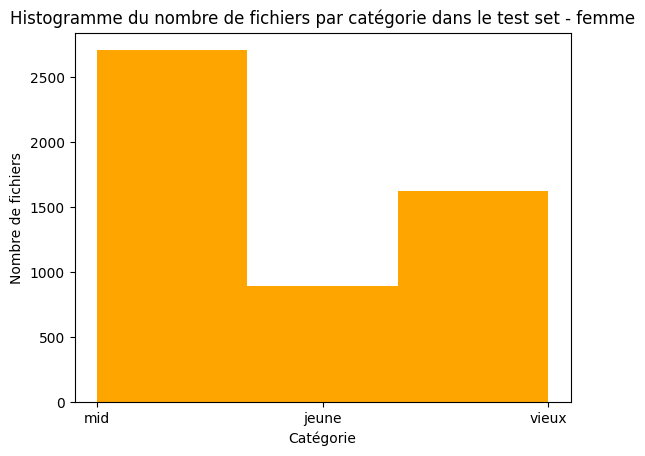

In [138]:
## Enregistre fichiers test et eval pour voir si le shuffle a fait du mauvais boulot
import matplotlib.pyplot as plt
dico_label = {'jeune': 1, 'mid': 2, 'vieux': 3}


cat = []
for fichier in list_fichier_test:
  cat.append(fichier.split('/')[-3])

plt.hist(cat, bins=3, color='orange')
plt.title("Histogramme du nombre de fichiers par catégorie dans le test set - femme")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de fichiers")
plt.show()

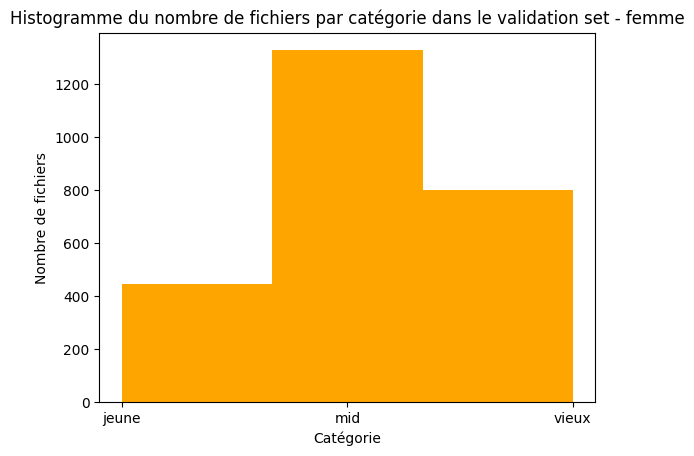

In [139]:
# pour les fichiers eval :
cat = []
for fichier in list_fichier_eval:
  cat.append(fichier.split('/')[-3])

plt.hist(cat, bins=3, color="orange")
plt.title("Histogramme du nombre de fichiers par catégorie dans le validation set - femme")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de fichiers")
plt.show()

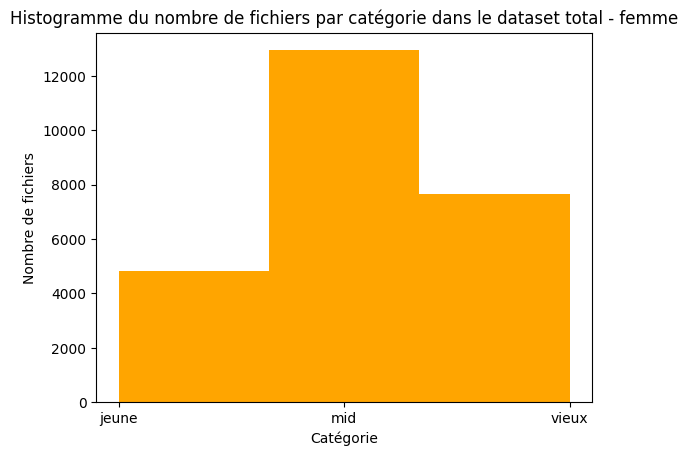

In [140]:
# pour les fichiers total : 
cat = []
for fichier in list_fichiers_fichiers_total_f:
  cat.append(fichier.split('/')[-3])

plt.hist(cat, bins=3, color="orange")
plt.title("Histogramme du nombre de fichiers par catégorie dans le dataset total - femme")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de fichiers")
plt.show()

In [16]:
# Récupérer les fichiers train

list_fichier_train = []

for fichier in list_fichiers_fichiers_total_f:
    if fichier not in list_fichier_test_eval:
        list_fichier_train.append(fichier)

print(len(list_fichier_train))

17634


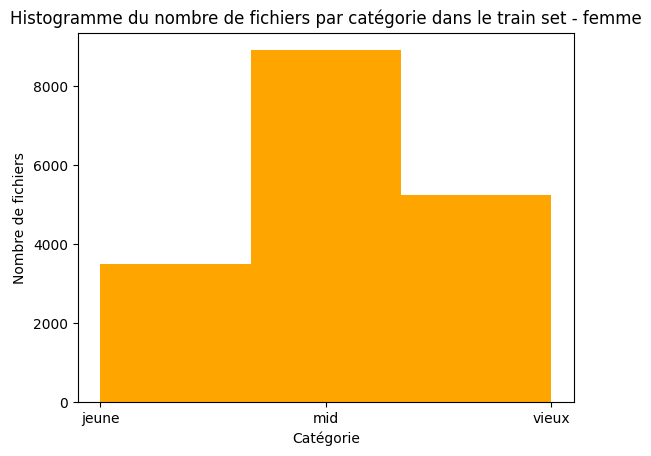

In [141]:
# pour les fichiers train :
cat = []
for fichier in list_fichier_train:
  cat.append(fichier.split('/')[-3])

plt.hist(cat, bins=3, color="orange")
plt.title("Histogramme du nombre de fichiers par catégorie dans le train set - femme")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de fichiers")
plt.show()

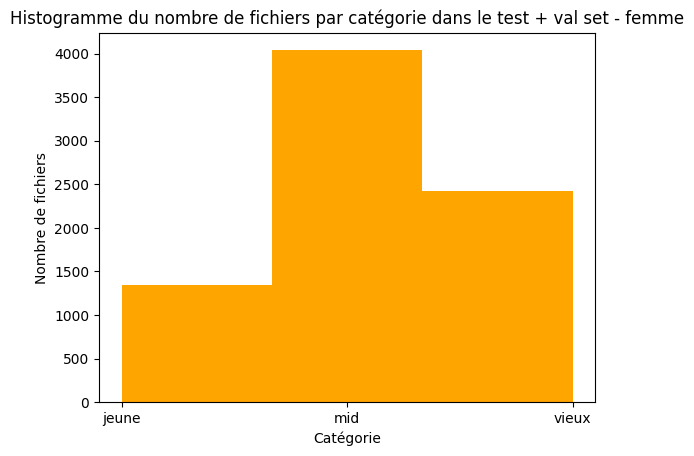

In [142]:
# histogramme du nombre de fichiers par catégorie dans le test + val set

cat = []
for fichier in list_fichier_test_eval:
  cat.append(fichier.split('/')[-3])

plt.hist(cat, bins=3, color="orange")
plt.title("Histogramme du nombre de fichiers par catégorie dans le test + val set - femme")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de fichiers")
plt.show()

In [21]:
list_fichier_train[:5]

['/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENT_1003/ESLO2_ENT_1003_0_16000Hz.pt',
 '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENT_1003/ESLO2_ENT_1003_1_16000Hz.pt',
 '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENT_1003/ESLO2_ENT_1003_2_16000Hz.pt',
 '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENT_1003/ESLO2_ENT_1003_3_16000Hz.pt',
 '/media/lise/SMARTDISK/BrissetLise_M2TAL_age/xvectors_4sec/femme/jeune/ESLO2_ENT_1003/ESLO2_ENT_1003_4_16000Hz.pt']

## DIVISION TRAIN / TEST / EVAL


In [22]:
import torch

# Annotation de la catégorie
dico_label = {'jeune': 0, 'mid': 1, 'vieux': 2}

# Initialisation des listes
x_test, y_test = [], []
x_val, y_val = [], []
x_train, y_train = [], []

In [23]:
from tqdm import tqdm

# Chargement des fichiers de test avec une barre de progression
for fichier in tqdm(list_fichier_test, desc="Chargement des fichiers de test"):
    x_test.append(torch.load(fichier))
    y_test.append(dico_label[fichier.split('/')[-3]])

# Chargement des fichiers d'évaluation avec une barre de progression
for fichier in tqdm(list_fichier_eval, desc="Chargement des fichiers d'évaluation"):
    x_val.append(torch.load(fichier))
    y_val.append(dico_label[fichier.split('/')[-3]])

# Chargement des fichiers d'entraînement avec une barre de progression
for fichier in tqdm(list_fichier_train, desc="Chargement des fichiers d'entraînement"):
    x_train.append(torch.load(fichier))
    y_train.append(dico_label[fichier.split('/')[-3]])


Chargement des fichiers de test:   0%|          | 0/5230 [00:00<?, ?it/s]

/tmp/ipykernel_5203/2703136689.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  x_test.append(torch.load(fichier))
Chargement des fichiers d'évaluation:   0%|          | 

In [24]:
import numpy as np

# Convertir les listes en numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

x_val = np.array(x_val)
y_val = np.array(y_val)

x_test = np.array(x_test)
y_test = np.array(y_test)

# Entrainement du modèle

on veut la structure suivante :
- couche dense : ReLu, L2 Régularization
- Dropout 0.2
- Dense : ReLu 64, L2 Régularization
- Dense : ReLu 32, L2 Régularization
- Dense : SoftMax 3
==> Output

In [25]:
# Librairies pour l'entrainement du modèle

In [26]:
from __future__ import print_function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy, sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adam
# from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

2025-01-17 16:26:50.573229: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737127610.775390    5203 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737127610.845883    5203 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-17 16:26:51.375320: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
# hyperparamètres

batch_size = 128
num_classes = 3
epochs = 50
input_shape = x_train.shape

In [28]:
print("train")
print(x_train.shape)
print(y_train.shape)
print("val")
print(x_val.shape)
print(y_val.shape)
print("test")
print(x_test.shape)
print(y_test.shape)

train
(17634, 1, 1, 512)
(17634,)
val
(2575, 1, 1, 512)
(2575,)
test
(5230, 1, 1, 512)
(5230,)


In [29]:
print(y_train)

[0 0 0 ... 2 2 2]


In [30]:
feature_vector_lenght = 512
x_train = x_train.reshape(x_train.shape[0], feature_vector_lenght)
x_test = x_test.reshape(x_test.shape[0], feature_vector_lenght)
x_val = x_val.reshape(x_val.shape[0], feature_vector_lenght)

y_train_1_hot = to_categorical(y_train, num_classes=3)
y_test_1_hot = to_categorical(y_test, num_classes=3)
y_val_1_hot = to_categorical(y_val, num_classes=3)

print(f"x_train : {x_train.shape}")
print(f"x_test : {x_test.shape}")
print(f"x_val : {x_val.shape}")
print(f"y_train_1_hot : {y_train_1_hot.shape}")
print(f"y_test_1_hot : {y_test_1_hot.shape}")
print(f"y_val_1_hot : {y_val_1_hot.shape}")

#test_size = y_test.shape[0]

x_train : (17634, 512)
x_test : (5230, 512)
x_val : (2575, 512)
y_train_1_hot : (17634, 3)
y_test_1_hot : (5230, 3)
y_val_1_hot : (2575, 3)


In [31]:
from keras.utils import to_categorical

# Convertir y_train en one-hot encoding
num_classes = 4  # Assurez-vous que cela correspond au nombre de classes (1, 2, 3, 4)
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)


In [32]:
def orane(x_train, y_train, x_test, y_test, x_val, y_val, batch_size=128, epochs=115, verbose =1):
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint('best_model.keras', monitor='val_loss', verbose=1, save_best_only=True)

    model = Sequential()

    model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer = l2(0.01)))
    #model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu', kernel_regularizer = l2(0.01)))
    # model.add(Flatten())
    # model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu', kernel_regularizer = l2(0.01)))
    model.add(Dense(3, activation='softmax'))


    # Optimizers on choisit Adam
    opt = Adam(learning_rate=0.001)

    model.compile(loss=categorical_crossentropy,
                  optimizer=opt, # ADA AUTRE CHOSE ADAM et sgd
                  metrics=['accuracy'])

    summary = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=verbose,
              validation_data=(x_val, y_val),
              callbacks = [es, mc])

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])



    return summary, model, score

# Fonction basé sur le schéma du mémoire d'Orane

In [33]:
summary_orane, model_orane, score_orane = orane(x_train, y_train_1_hot, x_test, y_test_1_hot, x_val, y_val_1_hot, batch_size=batch_size, epochs=epochs, verbose =1)

/home/lise/Documents/TAL_M2S3/CNN/venv_CNN/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-17 16:28:21.371510: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/50
135/138 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5502 - loss: 4.8243
Epoch 1: val_loss improved from inf to 3.05863, saving model to best_model.keras
138/138 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5540 - loss: 4.7848 - val_accuracy: 0.5122 - val_loss: 3.0586
Epoch 2/50
136/138 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8653 - loss: 2.1645
Epoch 2: val_loss improved from 3.05863 to 2.74355, saving model to best_model.keras
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8658 - loss: 2.1609 - val_accuracy: 0.5503 - val_loss: 2.7435
Epoch 3/50
137/138 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9306 - loss: 1.6209
Epoch 3: val_loss improved from 2.74355 to 2.62063, saving model to best_model.keras
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9307 - loss: 1.6197 - val_accuracy: 0.5507 - val_loss: 2.6206
Epoch 4/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9466 - loss: 1.3023
Epoch 4: val_loss improved from 2.62063 to 2.56185,

In [34]:
y_orane = model_orane.predict(x_test)

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [35]:
print(y_orane)
print(y_test_1_hot)

[[2.1841985e-01 7.7929461e-01 2.2853739e-03]
 [1.6609794e-01 8.1753874e-01 1.6363198e-02]
 [8.1978130e-01 1.7608577e-01 4.1328692e-03]
 ...
 [3.0814324e-04 9.9969184e-01 4.7505775e-08]
 [1.2155217e-05 1.0722835e-02 9.8926497e-01]
 [1.8460394e-04 1.4484251e-02 9.8533118e-01]]
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [36]:
y_pred_orane = np.argmax(y_orane, axis=1)
y_test_classes = np.argmax(y_test_1_hot, axis=1)

print(y_pred_orane)
print(y_test_classes)

[1 1 0 ... 1 2 2]
[1 1 0 ... 0 1 1]


In [64]:

def calcul_classification_metrics(y_test_classes, y_pred_classes, target_names):
  '''
    Fonction qui calcule les métriques de classification et les affiche.
  '''
  print(classification_report(y_test_classes, y_pred_classes, target_names=target_names))


def calcul_classification_metrics_to_latex(y_test_classes, y_pred_classes, target_names=None):
    '''
    Fonction qui calcule les métriques de classification et les affiche.
    '''
    tableau = classification_report(y_test_classes, y_pred_classes, target_names=target_names, output_dict=True)
    df = pd.DataFrame(tableau).transpose() 

    return df.to_latex()


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def show_confusion_matrix(y_test_classes, y_pred_classes, target_names, model_name):
    '''
    Fonction qui affiche la matrice de confusion.
    '''
    # Calculer la matrice de confusion
    cm = confusion_matrix(y_test_classes, y_pred_classes)

    # Convertir la matrice de confusion en DataFrame pour une visualisation plus facile
    cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)

    # Afficher la matrice de confusion avec seaborn
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='OrRd')
    plt.xlabel('Prédictions')
    plt.ylabel('Vraies Classes')
    plt.title('Matrice de Confusion du modèle ' + model_name)
    plt.show()


In [65]:
calcul_classification_metrics(y_test_classes, y_pred_orane, dico_label.keys())

              precision    recall  f1-score   support

       jeune       0.81      0.58      0.68       895
         mid       0.52      0.74      0.61      2710
       vieux       0.18      0.08      0.11      1625

    accuracy                           0.51      5230
   macro avg       0.50      0.47      0.47      5230
weighted avg       0.46      0.51      0.47      5230



In [145]:
print(calcul_classification_metrics_to_latex(y_test_classes, y_pred_orane, dico_label.keys()))

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
jeune & 0.812207 & 0.579888 & 0.676662 & 895.000000 \\
mid & 0.519969 & 0.739852 & 0.610722 & 2710.000000 \\
vieux & 0.180952 & 0.081846 & 0.112712 & 1625.000000 \\
accuracy & 0.508031 & 0.508031 & 0.508031 & 0.508031 \\
macro avg & 0.504376 & 0.467196 & 0.466699 & 5230.000000 \\
weighted avg & 0.464644 & 0.508031 & 0.467271 & 5230.000000 \\
\bottomrule
\end{tabular}



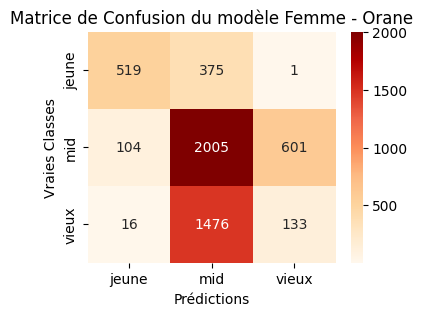

In [69]:
import pandas as pd
show_confusion_matrix(y_test, y_pred_orane, dico_label.keys(), "Femme - Orane")

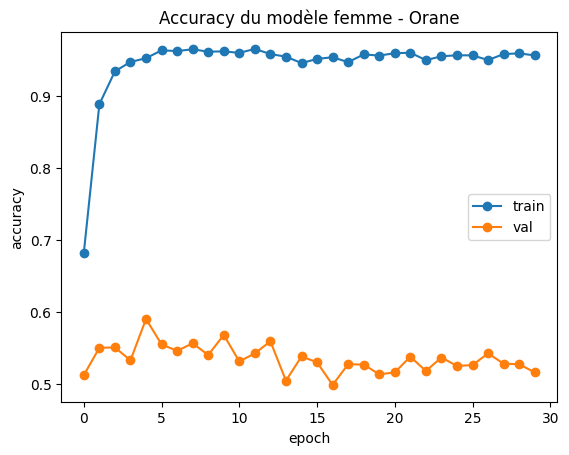

In [143]:
plt.plot(summary_orane.history['accuracy'], marker='o')
plt.plot(summary_orane.history['val_accuracy'],marker='o')
plt.title('Accuracy du modèle femme - Orane')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

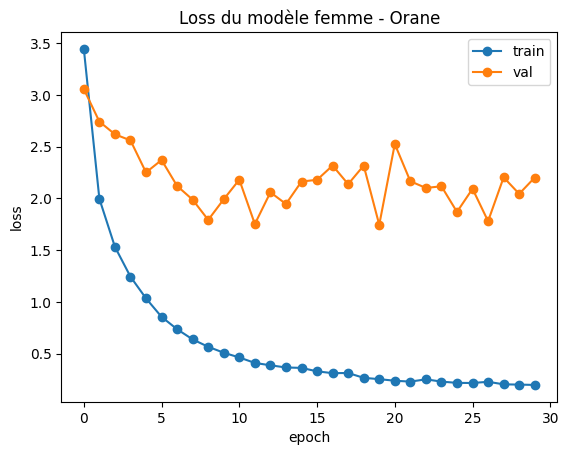

In [144]:
plt.plot(summary_orane.history['loss'], marker='o')
plt.plot(summary_orane.history['val_loss'],marker='o')
plt.title('Loss du modèle femme - Orane')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

## Deuxième version du CNN, réseau de neurones à notre manière : 

In [126]:
# Reshape des données d'entrée
x_train = x_train.reshape(-1, 512, 1)
x_test = x_test.reshape(-1, 512, 1)
x_val = x_val.reshape(-1, 512, 1)

print("taille de train :", x_train.shape)
print("taille de test :",x_test.shape)
print("taille de val :", x_val.shape)

input_shape = (512, 1)

batch_size = 128
epochs = 50

taille de train : (17634, 512, 1)
taille de test : (5230, 512, 1)
taille de val : (2575, 512, 1)


In [127]:
def cnn_quand_meme(x_train, y_train, x_test, y_test, x_val, y_val, batch_size=128, epochs=50, verbose =1, input_shape=(17634, 512)):
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    mc = ModelCheckpoint('second_best_model.keras', monitor='val_loss', verbose=1, save_best_only=True)

    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(Conv1D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Dropout(0.20))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))


    # Optimizers on choisit Adam
    opt = Adam(learning_rate=0.001)

    model.compile(loss=categorical_crossentropy,
                  optimizer=opt, # ADA AUTRE CHOSE ADAM et sgd
                  metrics=['accuracy'])

    summary = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=verbose,
              validation_data=(x_val, y_val), 
              callbacks = [es, mc])

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    return summary, model, score


In [128]:
summary_cnn, model_cnn, score_cnn = cnn_quand_meme(x_train, y_train_1_hot, x_test, y_test_1_hot, x_val, y_val_1_hot, batch_size=batch_size, epochs=epochs, verbose =1, input_shape=input_shape) 

/home/lise/Documents/TAL_M2S3/CNN/venv_CNN/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.5009 - loss: 4.5174
Epoch 1: val_loss improved from inf to 1.22467, saving model to second_best_model.keras
138/138 ━━━━━━━━━━━━━━━━━━━━ 19s 122ms/step - accuracy: 0.5016 - loss: 4.4977 - val_accuracy: 0.4602 - val_loss: 1.2247
Epoch 2/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.7415 - loss: 0.5449
Epoch 2: val_loss did not improve from 1.22467
138/138 ━━━━━━━━━━━━━━━━━━━━ 16s 118ms/step - accuracy: 0.7415 - loss: 0.5446 - val_accuracy: 0.5157 - val_loss: 1.2315
Epoch 3/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.7825 - loss: 0.4306
Epoch 3: val_loss did not improve from 1.22467
138/138 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - accuracy: 0.7825 - loss: 0.4305 - val_accuracy: 0.5437 - val_loss: 1.2708
Epoch 4/50
138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.7872 - loss: 0.3936
Epoch 4: val_loss did not improve from 1.22467
138/138 ━━━━━━━━━━━━━━━━━━━━ 16s 115ms/step - accuracy: 0.7

In [130]:
y_cnn = model_cnn.predict(x_test)

164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [131]:
# affichage de la matrice de confusion : 
y_pred_cnn = np.argmax(y_cnn, axis=1)
y_test_classes = np.argmax(y_test_1_hot, axis=1)

In [132]:
print(y_pred_cnn)
print(y_test_classes)

[1 1 0 ... 1 2 2]
[1 1 0 ... 0 1 1]


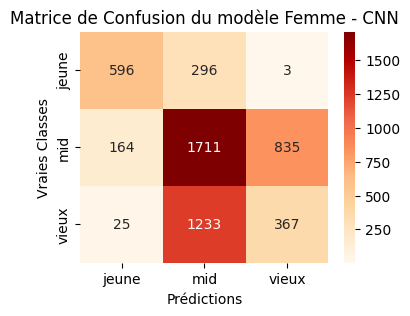

In [133]:
# Affichage de la matrice de confusion
show_confusion_matrix(y_test_classes, y_pred_cnn, dico_label.keys(), "Femme - CNN")

In [134]:
calcul_classification_metrics(y_test_classes, y_pred_cnn, dico_label.keys())

              precision    recall  f1-score   support

       jeune       0.76      0.67      0.71       895
         mid       0.53      0.63      0.58      2710
       vieux       0.30      0.23      0.26      1625

    accuracy                           0.51      5230
   macro avg       0.53      0.51      0.51      5230
weighted avg       0.50      0.51      0.50      5230



In [146]:
print(calcul_classification_metrics_to_latex(y_test_classes, y_pred_cnn, dico_label.keys()))

\begin{tabular}{lrrrr}
\toprule
 & precision & recall & f1-score & support \\
\midrule
jeune & 0.759236 & 0.665922 & 0.709524 & 895.000000 \\
mid & 0.528086 & 0.631365 & 0.575126 & 2710.000000 \\
vieux & 0.304564 & 0.225846 & 0.259364 & 1625.000000 \\
accuracy & 0.511281 & 0.511281 & 0.511281 & 0.511281 \\
macro avg & 0.530629 & 0.507711 & 0.514671 & 5230.000000 \\
weighted avg & 0.498193 & 0.511281 & 0.500016 & 5230.000000 \\
\bottomrule
\end{tabular}



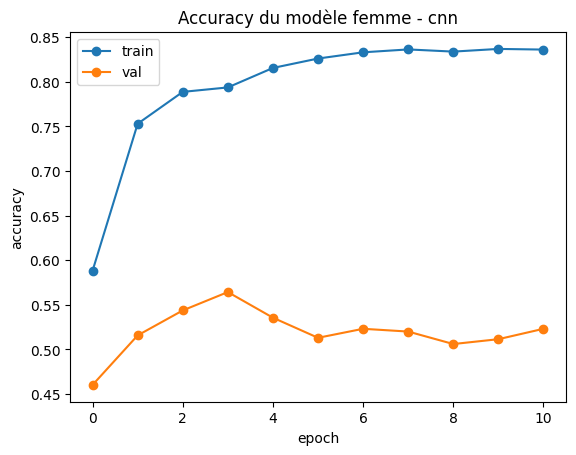

In [136]:
# Affichage des courbes d'apprentissage
plt.plot(summary_cnn.history['accuracy'], marker='o')
plt.plot(summary_cnn.history['val_accuracy'],marker='o')
plt.title('Accuracy du modèle femme - cnn')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

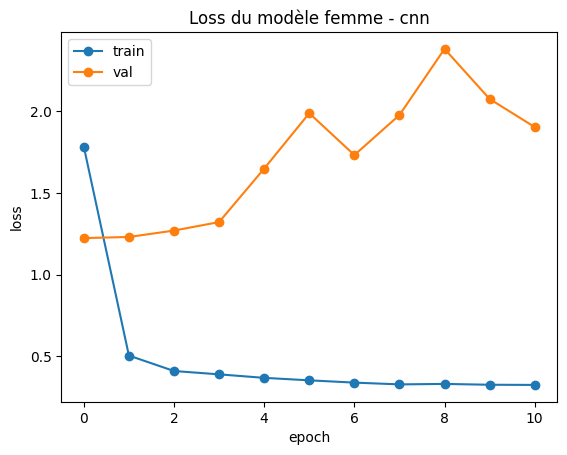

In [137]:
# Affichage des courbes d'apprentissage loss : 
plt.plot(summary_cnn.history['loss'], marker='o')
plt.plot(summary_cnn.history['val_loss'],marker='o')
plt.title('Loss du modèle femme - cnn')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()